# Notebook 2 - Linear Regression + Naive model

In [ ]:
################################## MODIFY PATHS TO RUN THE NOTEBOOK #########################################
data_folder = '/content/drive/MyDrive/final project/data/'
code_folder = '/content/drive/MyDrive/final project/code/'
##############################################################################################################

# mount drive:
from google.colab import drive
drive.mount('/content/drive')

# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from itertools import product
import pickle

# unpack kbest pkl:
with open(data_folder + 'processed_data_v2.pkl', 'rb') as f:
    data = pickle.load(f)
X_train2, X_test2, X_val2, y_train, y_val, y_test = data['X_train'], data['X_val'], data['X_test'], data['y_train'], data['y_val'], data['y_test']
numeric_cols, tfidf_cols = data['numeric_cols'], data['tfidf_cols']

# unpack original data pkl:
with open(data_folder + 'processed_data_v1.pkl', 'rb') as f:
    data = pickle.load(f)
X_train1, X_val1, X_test1  = data['X_train'], data['X_val'], data['X_test']

# unpack pca data pkl:
with open(data_folder + 'processed_data_v3.pkl', 'rb') as f:
    data = pickle.load(f)
X_train_pca, X_val_pca, X_test_pca  = data['X_train'], data['X_val'], data['X_test']

# unpack pca + kbest pkl:
with open(data_folder + 'processed_data_v4.pkl', 'rb') as f:
    data = pickle.load(f)

# import custom functions:
import sys
sys.path.append(code_folder)
from ml_final_project_functions import scale_numeric_and_tfidf, grid_search, plot_predictions

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Let's start by assessing our baseline performance by a naive model

In [ ]:
# naive model
average_citations = y_train.mean()
y_pred_naive = [average_citations] * len(y_val)
print(f'MSE: {mean_squared_error(y_val1, y_pred_naive)}')
print(f'R2: {r2_score(y_val, y_pred_naive)})')

y_train_pred= [average_citations] * len(y_train)
plot_predictions(y_train, y_train_pred, y_val, y_pred_naive)

NameError: name 'y_val1' is not defined

Now that we have our baseline we can try real models

R2: 0.07287449653938272
MSE: 32107.6622017739
R2_train: 0.06579463661632667
MSE_train: 44217.78708000726


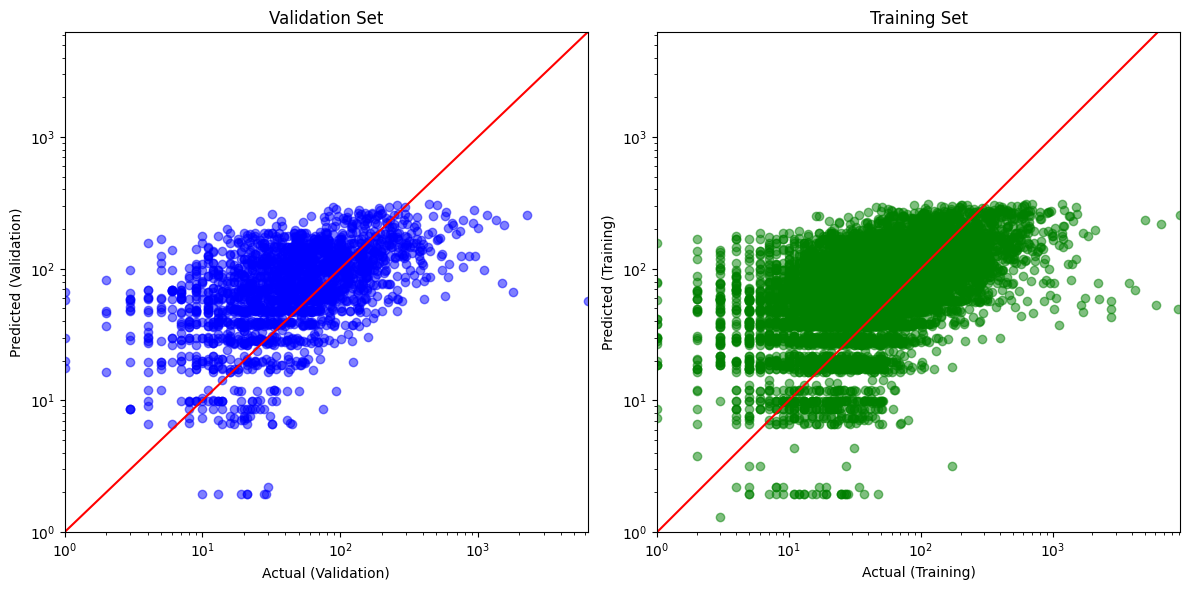

In [ ]:
# simple linear regression of Impact Factor and years from publish
model = LinearRegression()
model.fit(X_train1[['IF','years_from_publish']], y_train)
y_pred_linear = model.predict(X_val1[['IF','years_from_publish']])
print('R2:', model.score(X_val1[['IF','years_from_publish']], y_val))
print('MSE:', mean_squared_error(y_pred_linear, y_val))
print('R2_train:', r2_score(y_train, model.predict(X_train1[['IF','years_from_publish']])))
print('MSE_train:', mean_squared_error(y_train, model.predict(X_train1[['IF','years_from_publish']])))

plot_predictions(y_train,model.predict(X_train1[['IF','years_from_publish']]), y_val, y_pred_linear)

Linear regression

fitting 50 hyperparameters combinations
iteration number 10
iteration number 20
iteration number 30
iteration number 40
iteration number 50

best mse is 31905.31
best params:
 (('alpha', 2.2222777777777782), ('l1_ratio', 0.7000000000000001))


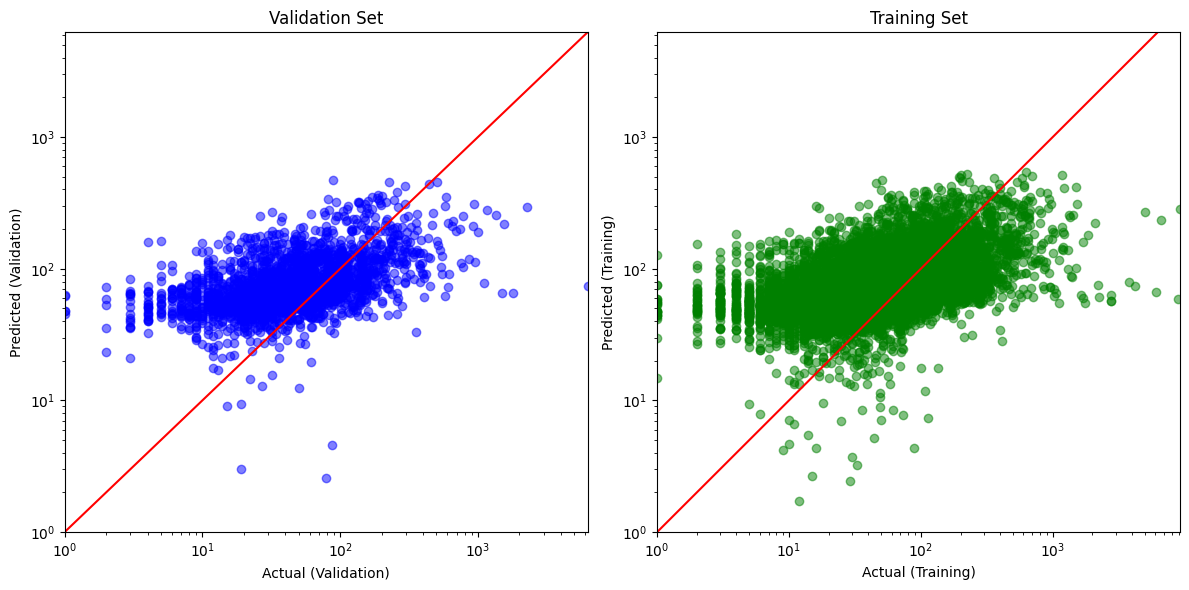

In [ ]:
model = ElasticNet(random_state=42,  max_iter=10000)
param_grid = {
    'alpha': np.linspace(0.0001,5,10),
    'l1_ratio': np.linspace(0.1,0.9,5)
}

results, best_model = grid_search(param_grid, model, X_train_pca, y_train, X_val_pca, y_val, verbose=10)
plot_predictions(y_train, best_model.predict(X_train_pca), y_val, best_model.predict(X_val_pca))

In [ ]:
results.head()

,params,r2 train,mse train,r2 val,mse val
23,"((alpha, 2.2222777777777782), (l1_ratio, 0.700...",0.071930,43927.372442,0.078718,31905.308755
28,"((alpha, 2.777822222222223), (l1_ratio, 0.7000...",0.071092,43967.068526,0.078709,31905.601061
34,"((alpha, 3.333366666666667), (l1_ratio, 0.9))",0.071601,43942.969168,0.078708,31905.652301
29,"((alpha, 2.777822222222223), (l1_ratio, 0.9))",0.072320,43908.913883,0.078686,31906.416896
22,"((alpha, 2.2222777777777782), (l1_ratio, 0.5))",0.071145,43964.550545,0.078599,31909.416745
